In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the dataset

In [26]:
data = pd.read_csv('housing.csv')

## Data Preprocessing 

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [28]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [29]:
data = data.dropna()

In [30]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [31]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [32]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [33]:
data.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


### Plotting correlation matrix

<AxesSubplot: >

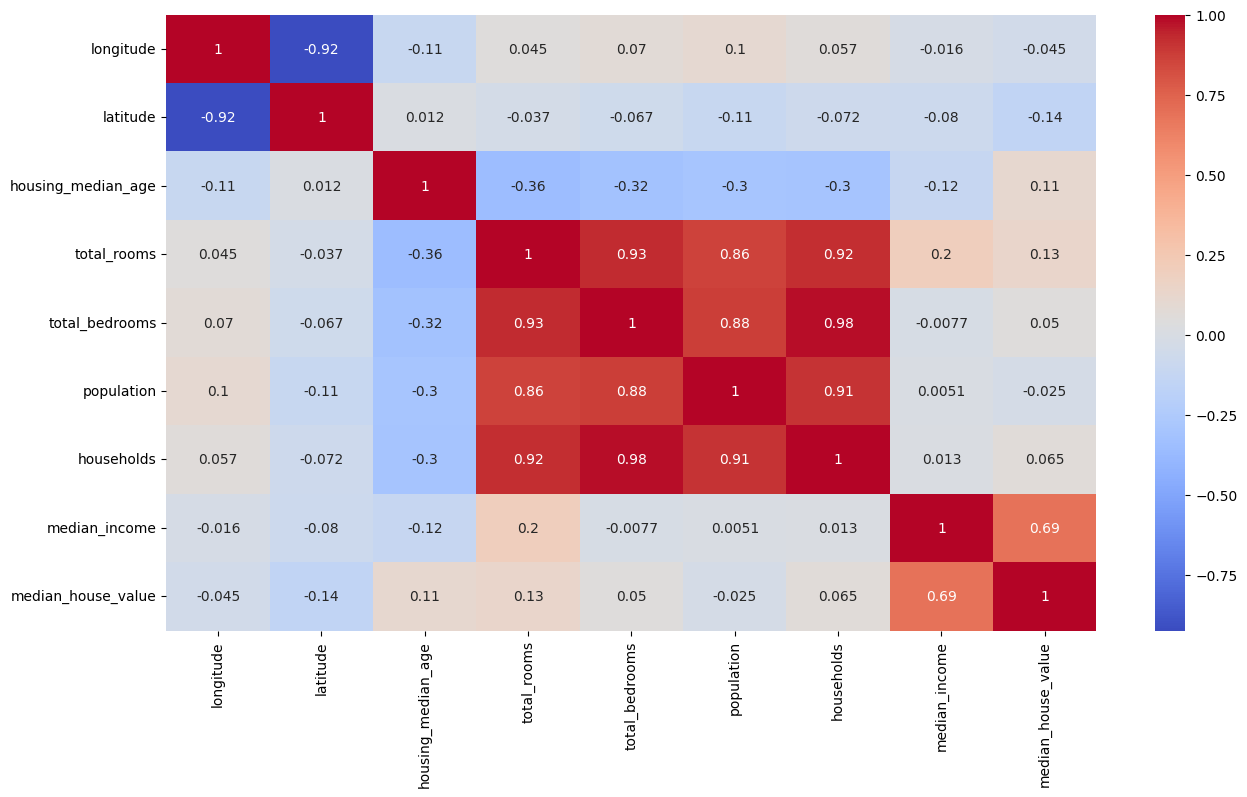

In [34]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

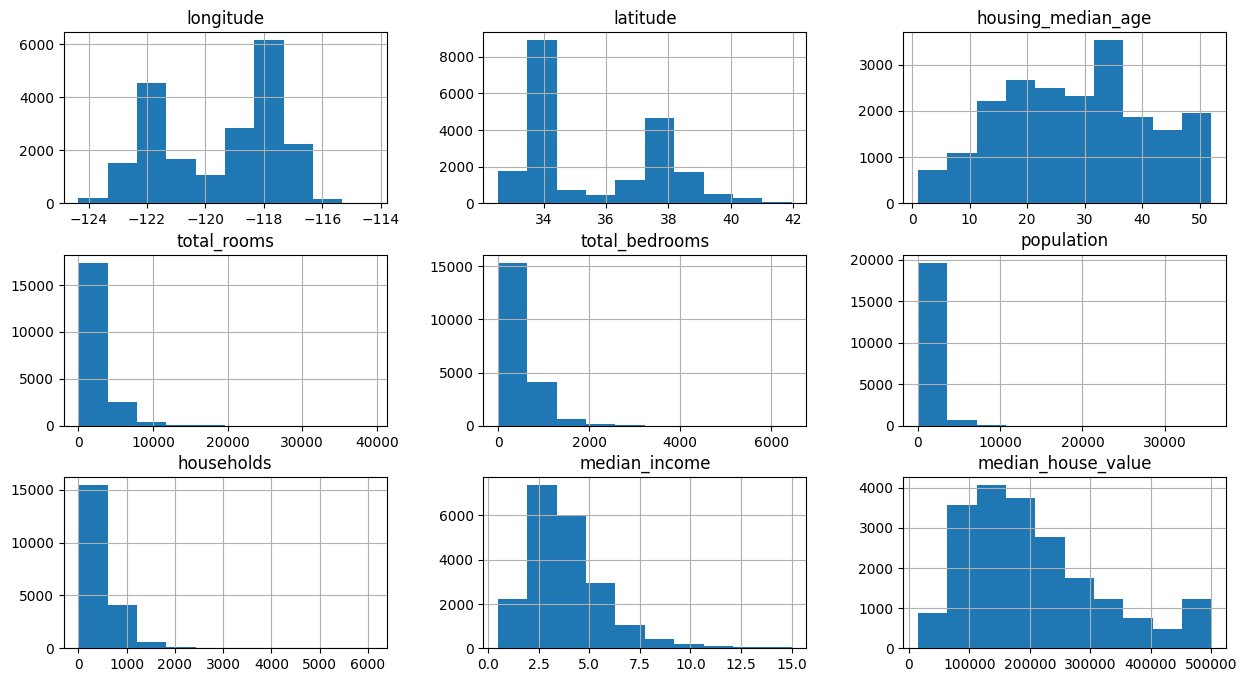

In [35]:
data.hist(figsize=(15,8))

### Applying log transformation to tackle right skewed features in the dataset

In [36]:
data['total_rooms'] = np.log1p(data['total_rooms'])
data['total_bedrooms'] = np.log1p(data['total_bedrooms'])
data['population'] = np.log1p(data['population'])
data['households'] = np.log1p(data['households'])

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

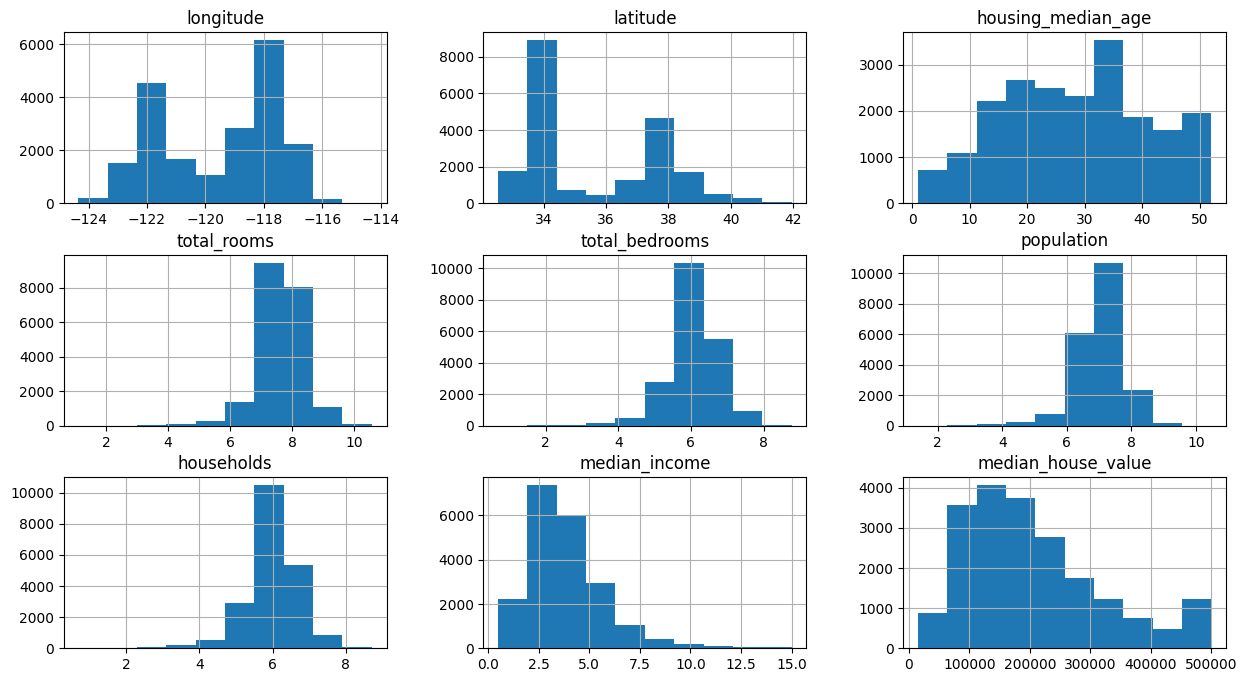

In [37]:
data.hist(figsize=(15, 8))

<AxesSubplot: >

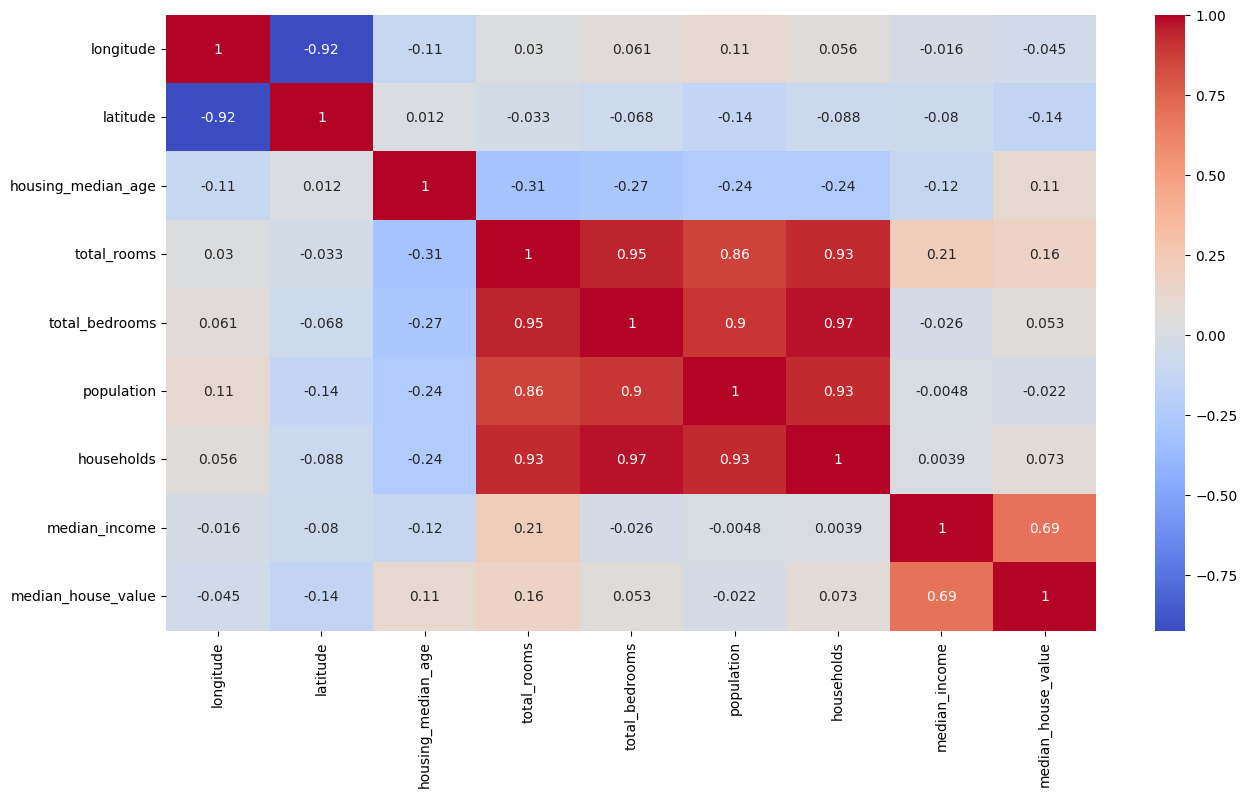

In [38]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")

### Plotting the latitude vs longitude with scatterplot to understand the house prices wrt the locations

<AxesSubplot: xlabel='latitude', ylabel='longitude'>

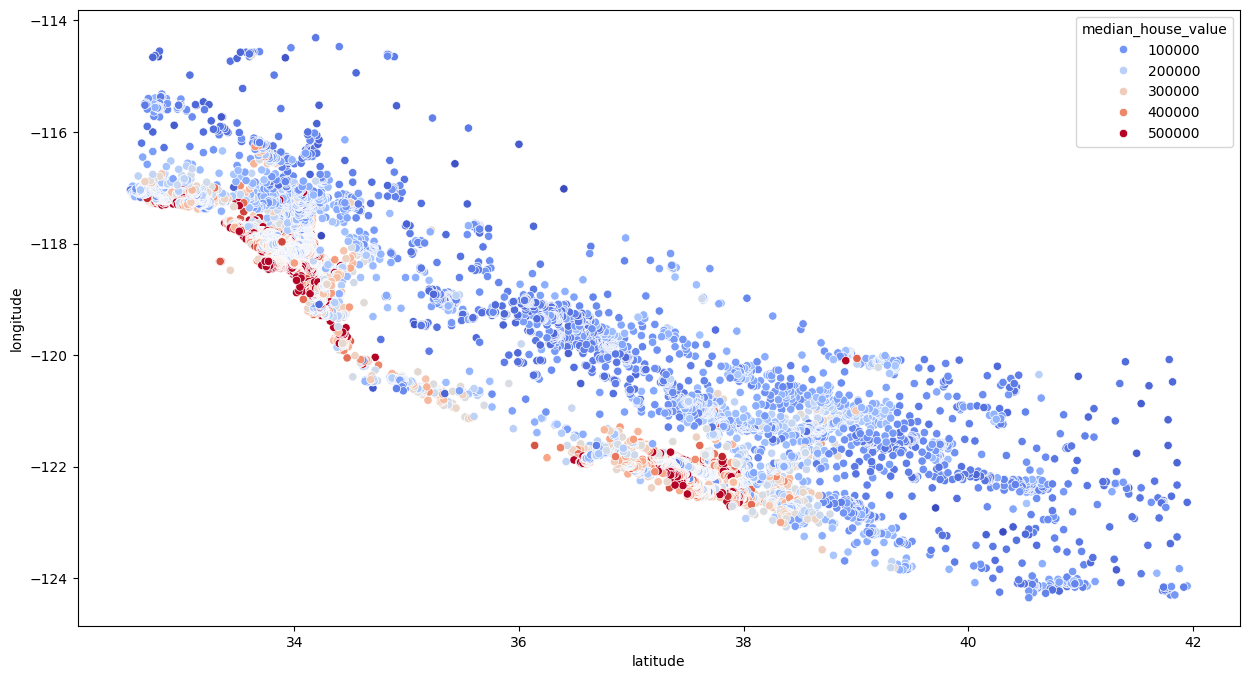

In [107]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=data,
                hue="median_house_value", palette="coolwarm")

In [39]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,NEAR BAY


### Using one hot encoding to convert categorical values into 0,1 integer values

In [42]:
categ = pd.get_dummies(data['ocean_proximity']).astype(int)
categ

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [43]:
data = data.join(categ).drop("ocean_proximity", axis=1)

## Splitting the dataset

In [52]:
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [109]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
8087,-118.20,33.81,47.0,7.761319,6.082219,7.106606,6.042633,5.3096,0,0,0,0,1
8240,-118.19,33.77,21.0,7.651596,6.590301,6.970730,6.403574,1.6178,0,0,0,0,1
6279,-117.95,34.02,22.0,7.560080,6.021023,7.093405,5.897154,4.2578,1,0,0,0,0
8226,-118.20,33.78,48.0,7.477038,6.210600,7.554335,6.146329,1.9872,0,0,0,0,1
1060,-121.88,39.74,12.0,9.590966,8.101375,8.925055,8.090402,1.6785,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19506,-121.03,37.63,5.0,7.966240,6.371612,7.307202,6.347389,3.0398,0,1,0,0,0
16017,-122.46,37.72,52.0,7.990238,6.008813,7.017506,5.986452,6.7228,0,0,0,0,1
8217,-118.19,33.78,24.0,5.420535,4.290459,6.086775,4.276666,2.8533,0,0,0,0,1
11232,-117.96,33.82,32.0,7.957527,6.434547,7.313220,6.400257,3.6300,1,0,0,0,0


In [58]:
y_train

8087     209900.0
8240     137500.0
6279     144100.0
8226     168800.0
1060     153100.0
           ...   
19506    120000.0
16017    405200.0
8217     137500.0
11232    183400.0
201      128800.0
Name: median_house_value, Length: 14303, dtype: float64

In [59]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6535,-118.05,34.05,36.0,6.989335,5.313206,6.825460,5.298317,3.7279,1,0,0,0,0
5255,-118.48,34.07,40.0,8.117312,6.184149,7.355641,6.261492,8.5153,1,0,0,0,0
10656,-117.83,33.67,17.0,7.876638,6.464588,7.282761,6.329721,3.7976,1,0,0,0,0
12068,-117.54,33.82,6.0,5.313206,3.401197,4.330733,3.367296,4.1250,0,1,0,0,0
965,-121.88,37.68,23.0,7.711997,5.602119,6.751101,5.659482,7.3330,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2638,-124.14,40.59,22.0,7.418181,6.006353,6.717805,5.948035,1.5625,0,0,0,0,1
16999,-122.27,37.54,15.0,7.662468,5.739793,6.809039,5.726848,8.9083,0,0,0,1,0
3550,-118.64,34.22,25.0,7.924072,6.018593,7.062192,6.086775,6.8643,1,0,0,0,0
1782,-122.36,37.94,27.0,6.739337,5.521461,6.369901,5.583496,0.9687,0,0,0,1,0


In [60]:
y_test

6535     162200.0
5255     500001.0
10656    275000.0
12068    216700.0
965      337200.0
           ...   
2638      66800.0
16999    500001.0
3550     333700.0
1782     105800.0
1619     364500.0
Name: median_house_value, Length: 6130, dtype: float64

## Fitting a Linear Regression model

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
linear = LinearRegression()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

linear.fit(X_train, y_train)

LinearRegression()

In [110]:
y_pred_lin = linear.predict(X_test)
y_pred_lin

/Users/akhilshridhar/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([-2.10189359e+17, -2.10189359e+17, -2.10189359e+17, ...,
       -2.10189359e+17, -1.33402701e+17, -1.33402701e+17])

In [63]:
linear.score(X_test, y_test)

0.668557681491508

In [66]:
linear.fit(X_train_s, y_train)

LinearRegression()

In [91]:
y_pred_lin_s = linear.predict(X_test_s)
y_pred_lin_s

array([163829.34754402, 414581.34754402, 230069.34754402, ...,
       340053.34754402, 134133.34754402, 313269.34754402])

### Calculating the R^2 and Mean Squared Error metrics

In [92]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred_lin_s)
mse = mean_squared_error(y_test, y_pred_lin_s)
r2, mse

(0.6686306907127384, 4370272525.482974)

In [67]:
linear.score(X_test_s, y_test)

0.6686306907127384

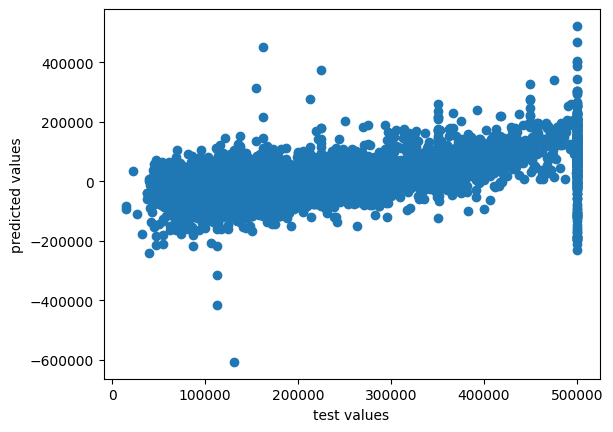

In [117]:
plt.scatter(y_test, y_test-y_pred_lin_s)
plt.xlabel("test values")
plt.ylabel("predicted values")
plt.show()

### Plotting the line 

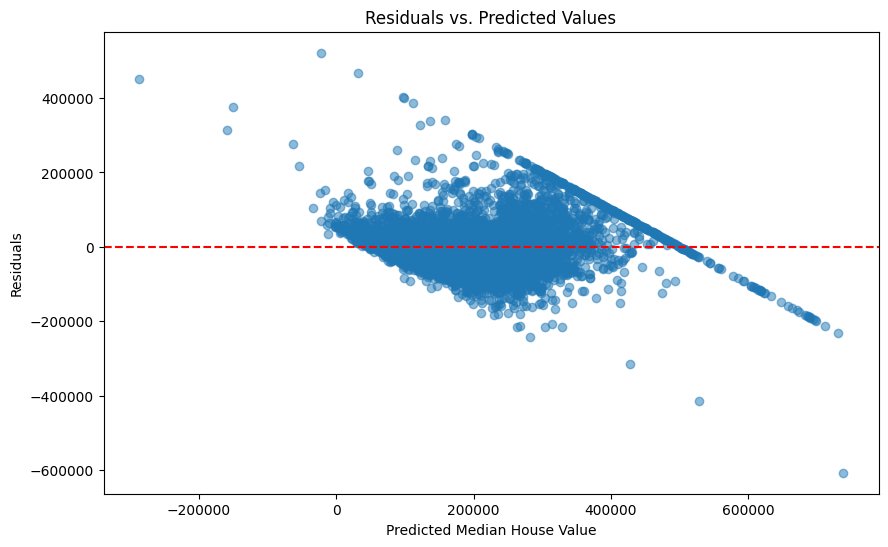

In [116]:
residuals = y_test - y_pred_lin_s

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_lin_s, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Median House Value')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

## Fitting a Random Forest Regressor Model

In [68]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train, y_train)

RandomForestRegressor()

In [82]:
y_pred = rf.predict(X_test)
y_pred

array([168772.  , 495150.92, 222136.  , ..., 335802.07,  93547.  ,
       336661.02])

In [83]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2, mse

(0.8191135048053992, 2385626121.7437387)

In [69]:
# score also gives us the r2 score
rf.score(X_test, y_test) 

0.8191135048053992

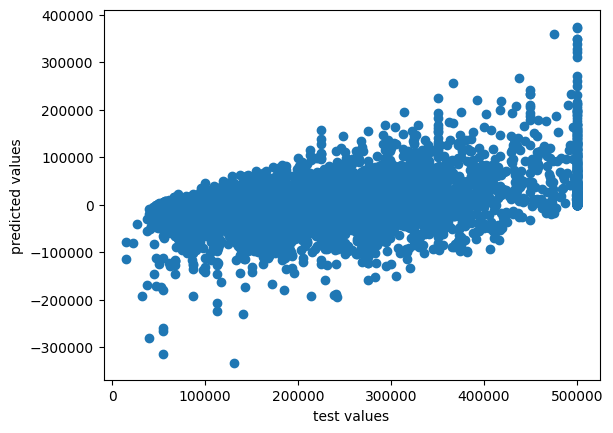

In [84]:
plt.scatter(y_test, y_test-y_pred)
plt.xlabel("test values")
plt.ylabel("predicted values")
plt.show()

In [73]:
importances = rf.feature_importances_
importances

array([1.07067712e-01, 1.02297514e-01, 5.57368212e-02, 2.43210170e-02,
       2.40838847e-02, 3.32990364e-02, 1.76813181e-02, 4.76820010e-01,
       4.29978351e-03, 1.46172767e-01, 3.89067637e-04, 1.09115763e-03,
       6.73991235e-03])

In [80]:
maxi = max(importances)
np.where(importances == maxi)

(array([7]),)

In [81]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,0,1,0,0,0


### Hyperparameter Tuning

In [108]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [3, 10, 30],
    'max_features': [2, 4, 6, 8],
}

grid_search = GridSearchCV(rf, param_grid, cv=5,
                           scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(X_train, y_train)
best_forest = grid_search.best_estimator_
best_forest
best_forest.score(X_test, y_test)

0.8185121451969156

## Fitting a Decision Tree Regressor

In [127]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)

dt.fit(X_train_s, y_train)

DecisionTreeRegressor(random_state=42)

In [128]:
y_pred = dt.predict(X_test_s)

In [129]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 4680059830.810277
R-squared: 0.645141536479519


In [134]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0,0,0,1,0


## Predicting price of new house with Random Forest Model

In [143]:
new_house = [[-122.22,	37.86,	21.0,	8.867850,	7.009409,	7.784057,	7.037906,	8.3014,	0,	0,	0,	1,	0]]

# Make prediction
predicted_price = rf.predict(new_house)

print(f"Predicted House Price: ${predicted_price[0]:.2f}")

Predicted House Price: $384225.01


/Users/akhilshridhar/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
